In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import csv

# Reading data from a csv file
class ReadDataSet:
        def __init__(self, file_name, batch=3):
            self.__dataset = file_name
            self.__batch = batch
        def get_dataset_by_batch(self):
            """
                Algorithm of reading data from a file by batchs, this alogrithm is also handy with a SGD (stochastic gradien descent) ML algorithm
            """
            with open(self.__dataset) as dataset_file:
                rows = []
                for n,i in enumerate(csv.reader(dataset_file)):
                    if n > 0 and n % self.__batch == 0:
                        yield(np.array(rows))
                        rows = []
                    rows.append(i)
        def get_dataframe(self):
            """
                Load all data at once with pandas dataframe
            """
            dataset_frame = pd.read_csv(self.__dataset, sep=",", header=None, names=["age", "work", "fnlwgt", "education", "education-num","marital-status", "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week", "native-country","income"])
            return dataset_frame
dataset = ReadDataSet("Datasets/adult.data.csv", 5)


In [ ]:
# Get by batchs
for batch_set in dataset.get_dataset_by_batch():
    print(batch_set)
    break

In [24]:
# Get a dataframe
dataset_frame = dataset.get_dataframe()
age_income = dataset_frame[["age", "income"]]

In [ ]:
dataset_frame['color'].head(1)

In [9]:
#Some random search through a dataset, just to practise pandas
filter_above_30 = dataset_frame["age"] > 30
above_30_frame = dataset_frame[filter_above_30]
filter_white = above_30_frame["color"] == above_30_frame["color"].unique()[0]
above_30_white = above_30_frame[filter_white]

In [25]:
dataset_frame

,age,work,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
#Data explore
dataset_frame.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

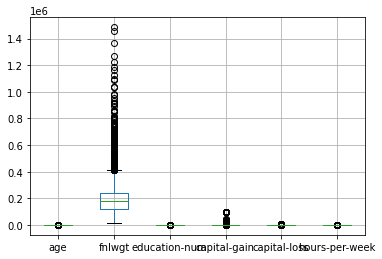

In [27]:
dataset_frame.boxplot(return_type='axes')

<AxesSubplot:xlabel='age', ylabel='fnlwgt'>

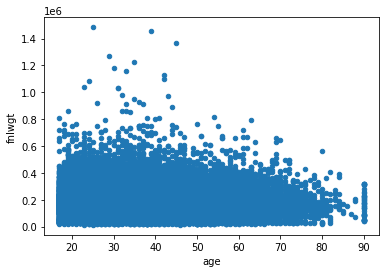

In [31]:
dataset_frame.plot.scatter(x='age', y='fnlwgt')